<a href="https://colab.research.google.com/github/tohnperfect/DPDM2024/blob/main/RF_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0 import decision tree algorithm and load data

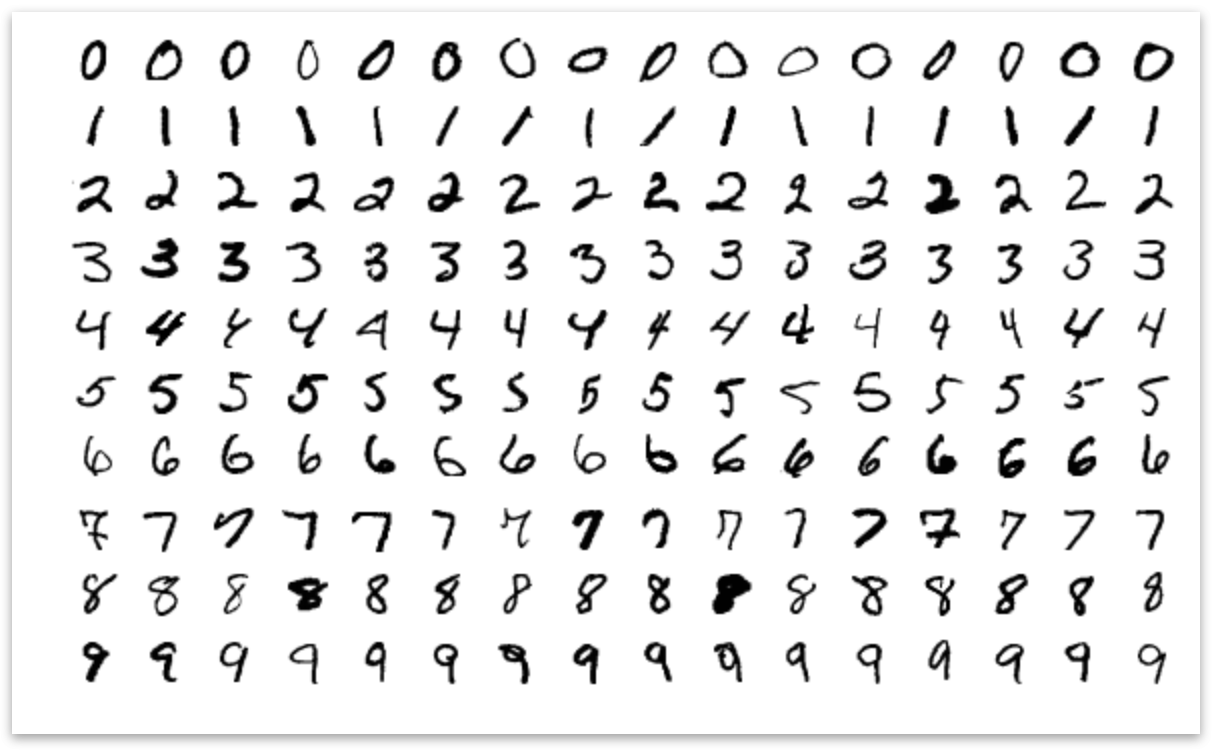

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
digits['data'].shape

(1797, 64)

In [ ]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

4

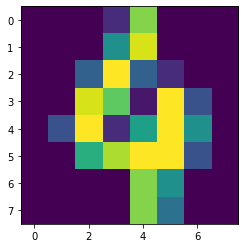

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(digits['images'][100])
digits['target'][100]

#### 0.1 split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =
 train_test_split(digits['data'], digits['target'], test_size=0.2, random_state=6)

In [ ]:
y_test.shape

(360,)

In [ ]:
y_train.shape

(1437,)

#### 0.2 test decision tree performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=0)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
tree.score(X_test,y_test)

0.8388888888888889

# Random Forests

### 1 Bootstrap sampling the training data

In [ ]:
N = 100  # number of trees in the forest

In [ ]:
training_data = list()
for i in range(N): ##ต้นไม้แต่ละต้นเห็น data = 80%
    X_sp, X_dp, y_sp, y_dp = train_test_split(X_train, y_train, test_size=0.2, random_state = i+6)
    training_data.append({'X':X_sp,'y':y_sp})

### 2 Train separately

In [ ]:
classifier_forest = list()
for i in range(N):
    tree = DecisionTreeClassifier(max_features='sqrt',random_state=i+2)
    tree.fit(training_data[i]['X'], training_data[i]['y'])
    classifier_forest.append(tree)

### 3 To predict, aggregating

In [ ]:
prediction = list()
for i in range(N):
    pred = classifier_forest[i].predict(X_test)
    #print(pred)
    prediction.append(pred)

In [ ]:
prediction

[array([1, 9, 6, 0, 8, 5, 7, 8, 4, 2, 7, 6, 2, 6, 0, 7, 9, 3, 1, 3, 7, 2,
        2, 2, 0, 6, 8, 6, 5, 5, 0, 2, 7, 3, 5, 3, 6, 7, 6, 5, 7, 6, 2, 8,
        2, 7, 4, 7, 6, 6, 4, 1, 6, 8, 6, 4, 1, 2, 0, 2, 7, 3, 4, 0, 4, 7,
        5, 7, 1, 4, 5, 0, 4, 1, 0, 0, 5, 8, 3, 0, 0, 2, 3, 0, 8, 1, 4, 0,
        8, 2, 9, 9, 7, 1, 3, 8, 4, 3, 4, 6, 0, 4, 9, 1, 1, 4, 7, 1, 6, 7,
        5, 6, 5, 0, 5, 4, 3, 1, 4, 0, 1, 4, 5, 5, 3, 7, 2, 7, 1, 0, 0, 9,
        1, 8, 1, 6, 3, 4, 9, 8, 7, 7, 4, 6, 6, 2, 3, 8, 3, 7, 3, 5, 3, 8,
        5, 1, 2, 1, 1, 8, 8, 2, 6, 8, 0, 5, 2, 3, 5, 2, 7, 1, 2, 8, 3, 0,
        4, 7, 6, 5, 0, 1, 2, 7, 0, 9, 4, 2, 3, 8, 5, 3, 2, 9, 0, 4, 8, 2,
        3, 4, 4, 0, 5, 7, 0, 2, 3, 9, 2, 1, 2, 5, 7, 8, 7, 3, 0, 2, 9, 7,
        1, 7, 0, 0, 2, 7, 2, 4, 1, 7, 2, 6, 2, 8, 1, 2, 8, 2, 5, 7, 5, 6,
        0, 5, 6, 5, 3, 5, 9, 6, 2, 5, 2, 4, 3, 7, 4, 1, 9, 2, 3, 3, 1, 9,
        7, 9, 3, 3, 5, 9, 4, 6, 8, 2, 5, 4, 6, 0, 7, 4, 4, 5, 2, 0, 9, 8,
        5, 8, 7, 9, 0, 6, 7, 2, 1, 6, 

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
m = stats.mode(np.array(prediction))

In [ ]:
m

ModeResult(mode=array([[1, 9, 6, 0, 8, 5, 7, 8, 4, 2, 7, 6, 2, 6, 0, 7, 4, 3, 1, 3, 7, 2,
        2, 2, 0, 6, 2, 6, 5, 0, 0, 2, 7, 3, 5, 6, 6, 7, 6, 5, 7, 6, 2, 8,
        2, 7, 4, 7, 6, 6, 6, 1, 6, 8, 6, 4, 1, 2, 0, 2, 4, 3, 4, 0, 4, 7,
        5, 4, 1, 9, 5, 0, 4, 1, 0, 0, 5, 8, 3, 0, 0, 2, 8, 0, 8, 1, 4, 0,
        8, 2, 9, 9, 1, 1, 5, 8, 4, 8, 4, 6, 0, 4, 9, 1, 1, 4, 7, 1, 6, 7,
        5, 4, 5, 0, 5, 4, 3, 6, 4, 0, 1, 4, 5, 5, 3, 1, 2, 1, 1, 0, 7, 5,
        1, 4, 9, 6, 8, 4, 9, 8, 7, 4, 4, 6, 6, 2, 3, 9, 3, 7, 3, 5, 3, 8,
        5, 1, 2, 1, 1, 8, 8, 2, 6, 9, 0, 5, 3, 3, 5, 7, 7, 1, 4, 8, 3, 0,
        4, 7, 6, 5, 0, 1, 2, 4, 9, 9, 4, 2, 2, 8, 5, 3, 2, 9, 0, 4, 8, 2,
        3, 4, 4, 0, 5, 7, 0, 2, 3, 9, 2, 1, 8, 5, 7, 8, 7, 3, 0, 2, 9, 7,
        7, 7, 0, 0, 2, 4, 2, 4, 8, 7, 0, 6, 2, 0, 2, 2, 9, 2, 5, 7, 5, 6,
        0, 5, 6, 5, 3, 0, 9, 6, 2, 5, 2, 4, 3, 7, 4, 1, 9, 2, 3, 3, 1, 9,
        7, 9, 3, 3, 5, 2, 4, 1, 8, 2, 5, 9, 6, 0, 7, 4, 4, 8, 2, 0, 9, 8,
        5, 3, 7, 3, 0,

### 4 Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, m.mode.squeeze())

0.9833333333333333

## Use SKLearn Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier()
skRF.fit(X_train,y_train)
skRF.score(X_test,y_test)

0.9777777777777777